In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\asus\Downloads\Breast_Cancer_Naive_Bayes\Breast_cancer_data.csv")
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


# Basic EDA
* Continuous Feature is not good for Naive Bias
* For Naive Bias Classifier features must be independent from each other.




<AxesSubplot: >

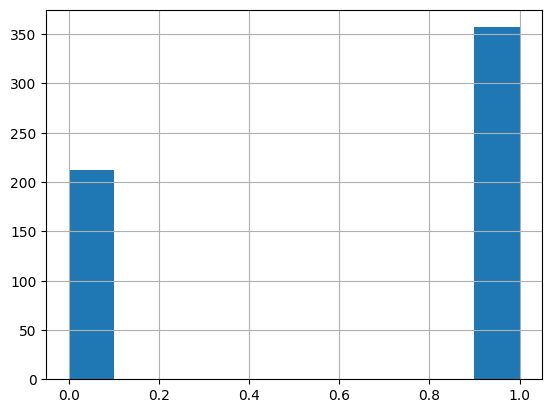

In [3]:
data["diagnosis"].hist()

<AxesSubplot: >

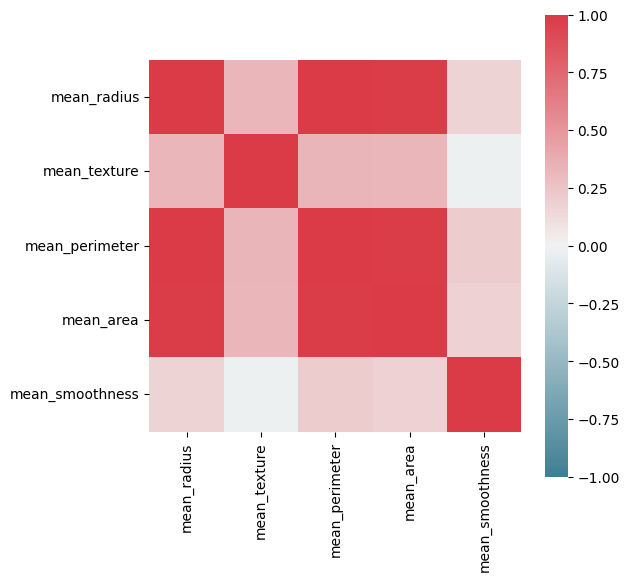

In [4]:
corr = data.iloc[:, :-1].corr(method="pearson")
corr
f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(corr, cmap= sns.diverging_palette(220, 10, as_cmap=True), vmin = -1.0, vmax = 1.0, square= True, ax = ax)

In [23]:
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


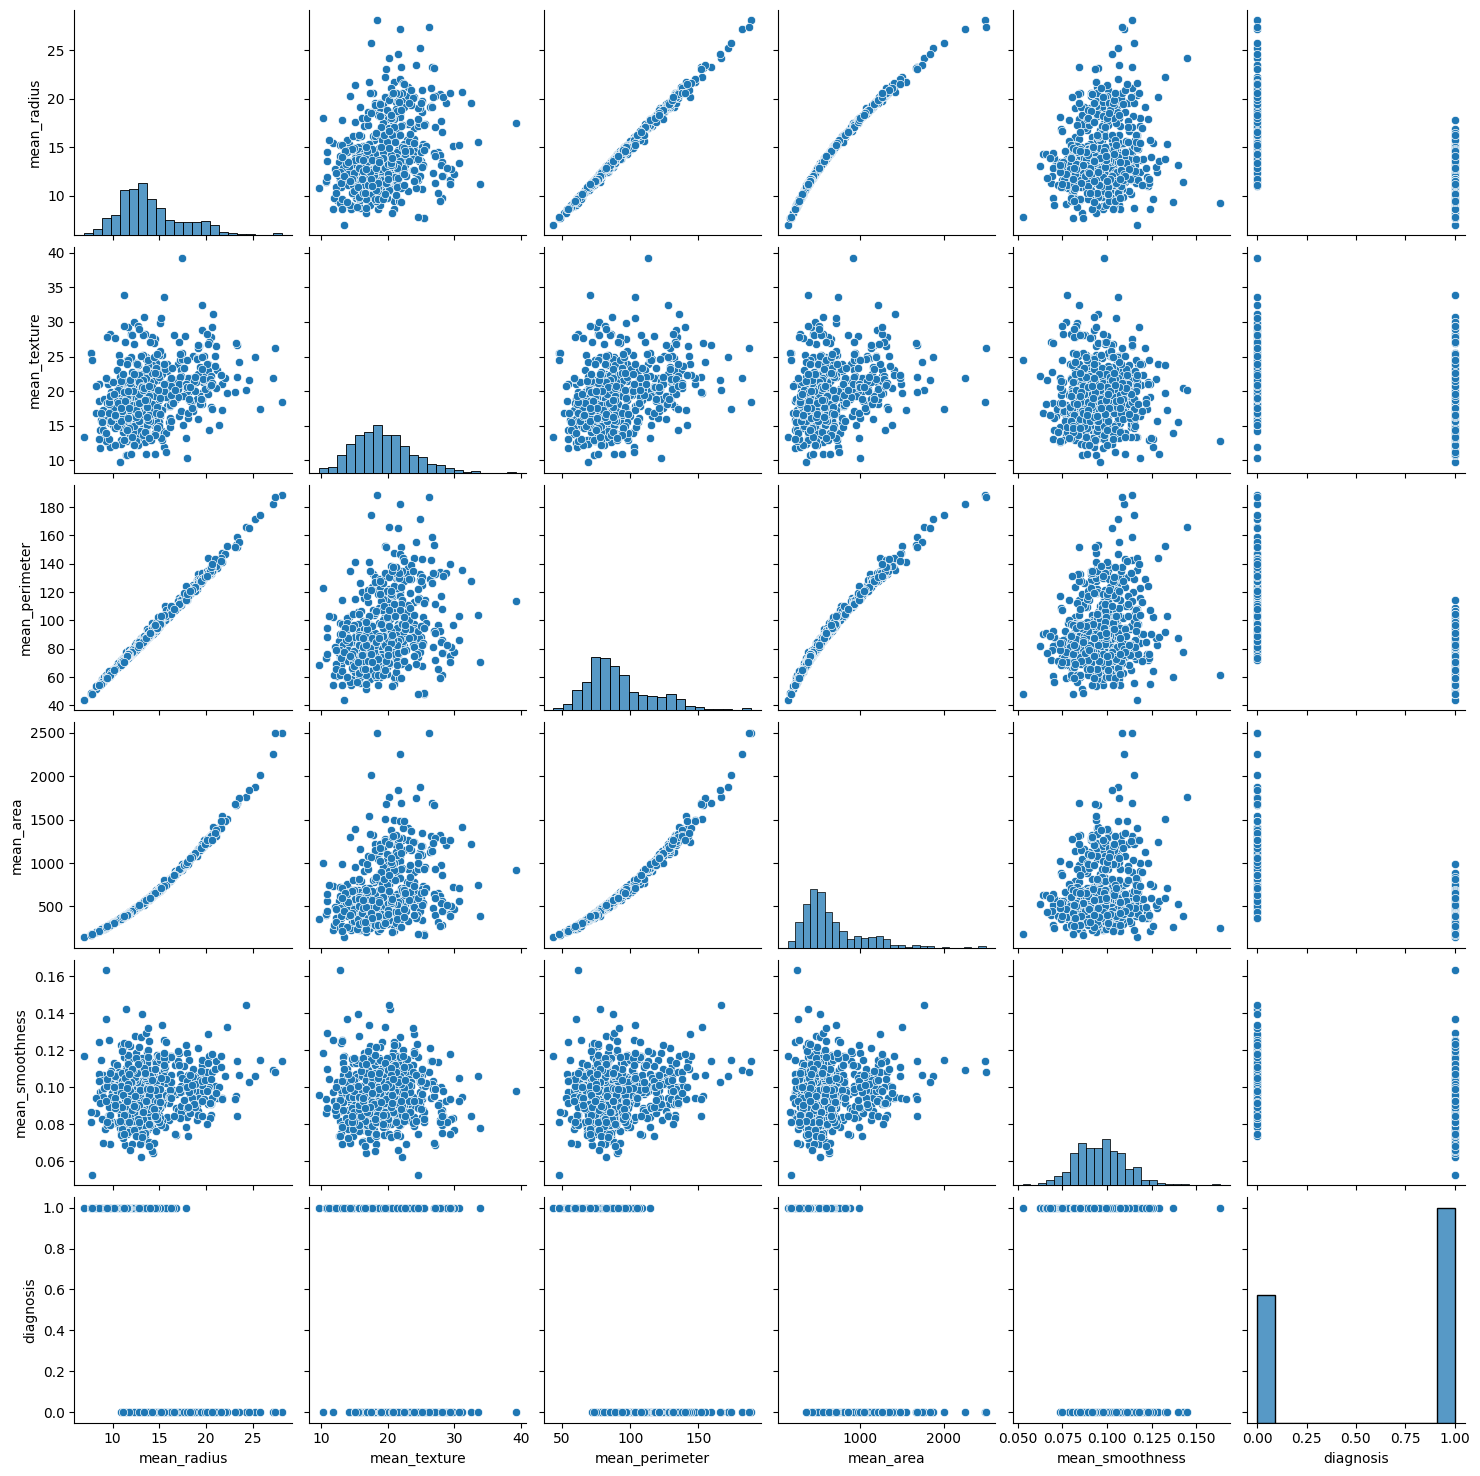

In [5]:
sns.pairplot(data)

In [6]:
x = data.iloc[:, :-1]
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [7]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]

In [8]:
data

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


<AxesSubplot: xlabel='mean_smoothness', ylabel='Count'>

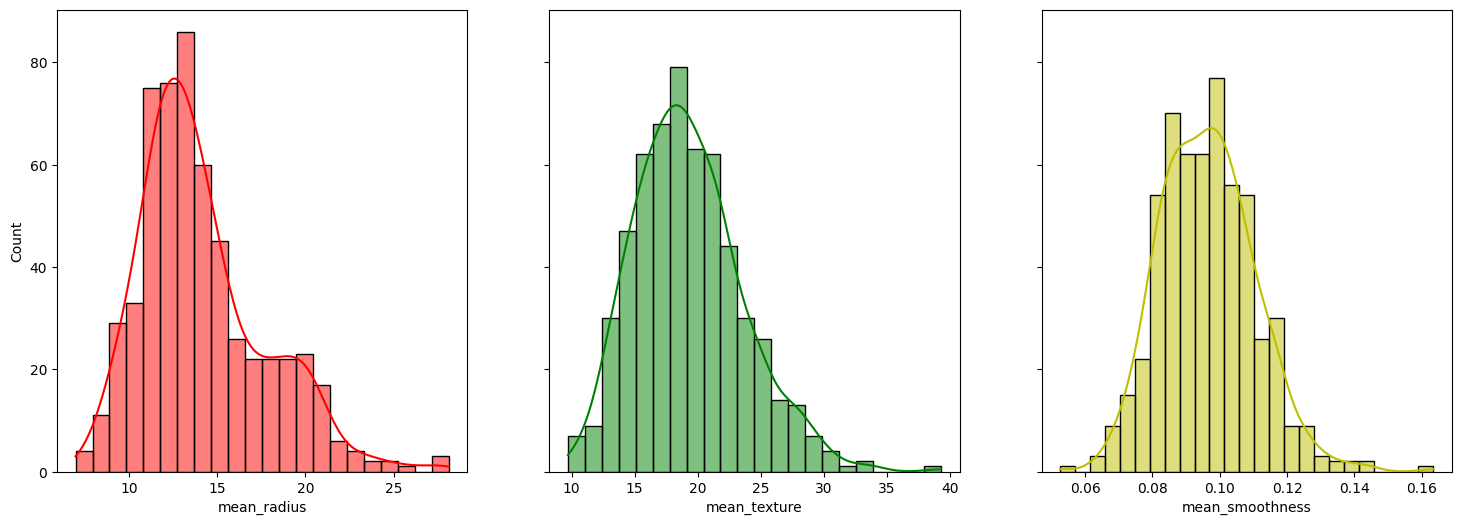

In [9]:
fig,axes = plt.subplots(1, 3, figsize = (18, 6), sharey=True)
sns.histplot(data, ax = axes[0], x = "mean_radius", kde = True, color="r")
sns.histplot(data, ax = axes[1], x = "mean_texture", kde = True, color="g")
sns.histplot(data, ax = axes[2], x = "mean_smoothness", kde = True, color="y")

In [18]:
def calculate_prior(data, Y):
    classes = sorted(list(data[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(data[data[Y] == i]) / len(data))
    return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)

In [17]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis'], dtype='object')

In [19]:
data = data[data[Y]= label]

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1238824135.py, line 1)